## Line Graphs in Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# plt.style.use('ggplot') # Other sytles to use; fivethirtyeight
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)}) # Set figure size 
sns.set(font_scale = 3)

###### Simple line graph

In [3]:
ex_rate_df=pd.read_csv('Exchange_Rates.csv')
ex_rate_df['TIME']=ex_rate_df['TIME'].astype(str)
simple_line_graph_ex_rate_df=ex_rate_df.query("LOCATION=='AUS'")
simple_line_graph_ex_rate_df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EXCH,TOT,NATUSD,A,2000,1.724827,NaN
1,AUS,EXCH,TOT,NATUSD,A,2001,1.933443,NaN
2,AUS,EXCH,TOT,NATUSD,A,2002,1.840563,NaN
3,AUS,EXCH,TOT,NATUSD,A,2003,1.541914,NaN
4,AUS,EXCH,TOT,NATUSD,A,2004,1.359752,NaN


In [4]:
ex_rate_df.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes    float64
dtype: object

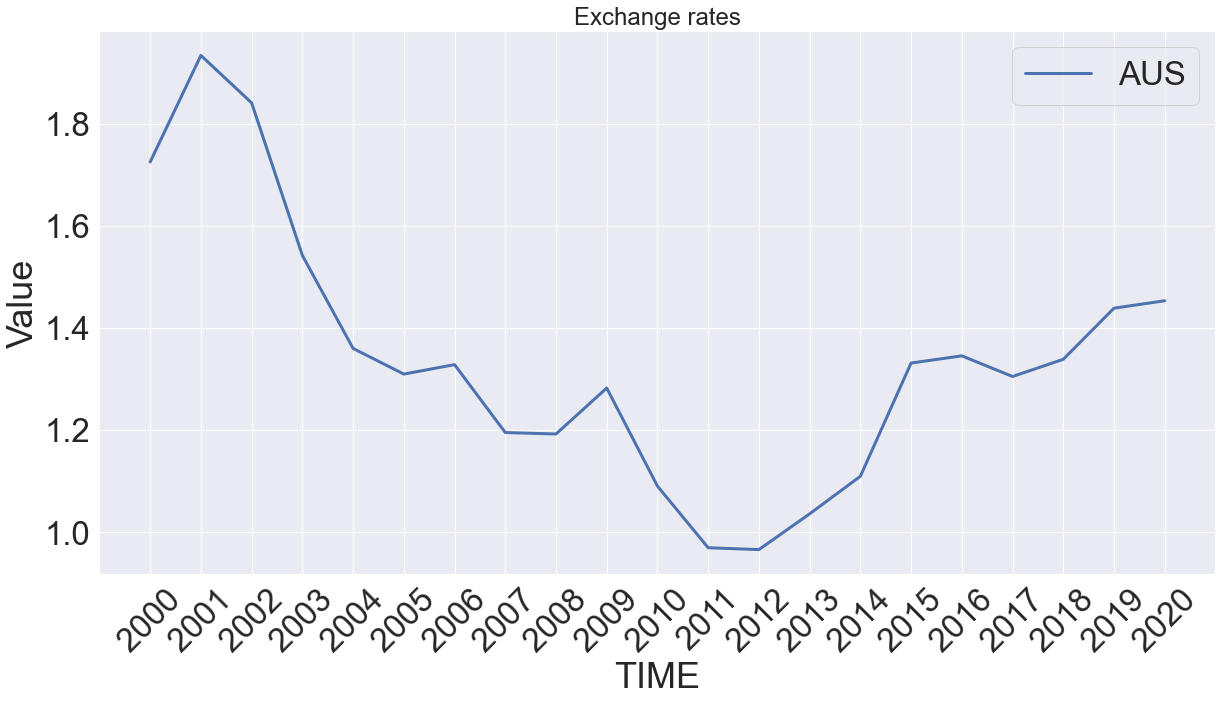

In [5]:
sns.lineplot(data=simple_line_graph_ex_rate_df, x=simple_line_graph_ex_rate_df['TIME'],
             y=simple_line_graph_ex_rate_df['Value'],linewidth=3)
plt.title('Exchange rates',fontsize=24)
plt.legend(['AUS'], loc='upper right')
plt.xticks(rotation=45)
plt.show()

###### Multiple line graphs

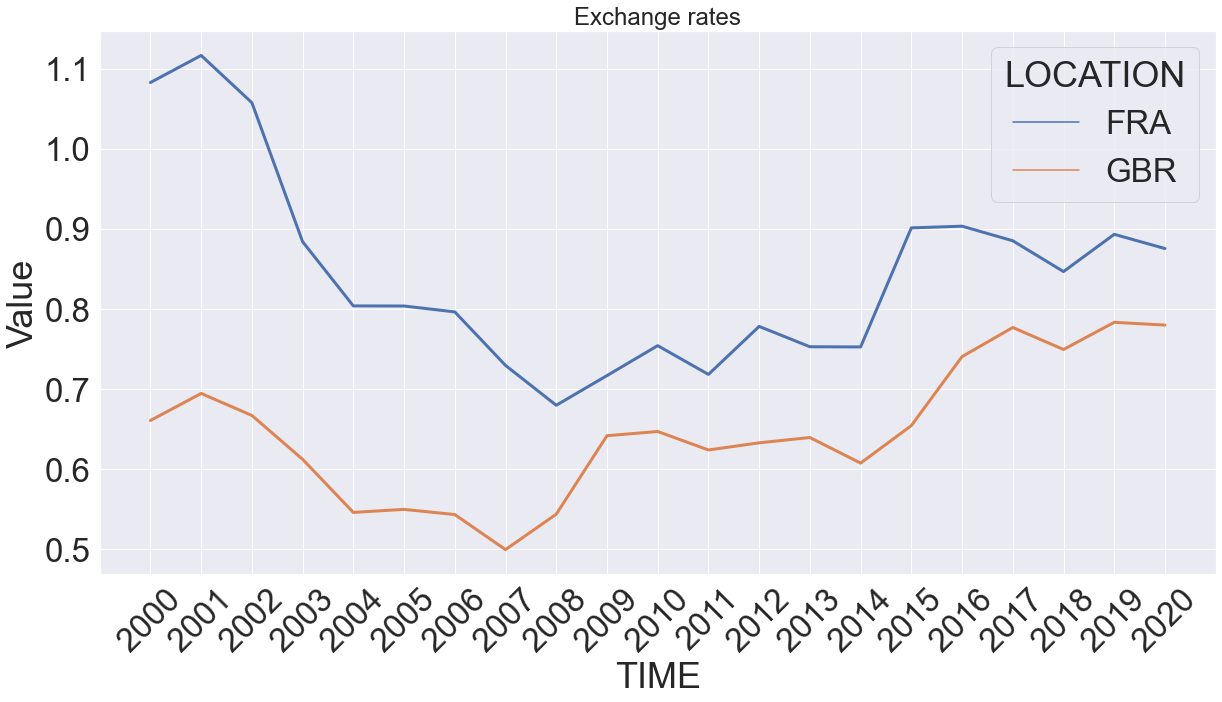

In [6]:
ex_rate_df=ex_rate_df[ex_rate_df['LOCATION'].isin(['FRA','GBR','USD'])]
sns.lineplot(data=ex_rate_df, x=ex_rate_df['TIME'], y=ex_rate_df['Value'],hue=ex_rate_df['LOCATION'],
              linewidth=3)
plt.title('Exchange rates',fontsize=24)
plt.xticks(rotation=45)
plt.show()

## Bar Plot

In [7]:
score_df = pd.DataFrame(
    {
        "Students": ["Tom", "Peter","Simon", "Mary", "Jane","King","Hillary","Ethan","Page"],
        "Math": [79.00, 67.00,80.00, 84.00, 70.00,60.00,90.00,76.00,75],
        "Physics":[63.00, 98, 60.00, 90,84.00, 77.00,55.00,70,66.00],
        "Computer":[84.00,78.00, 57.00, 88.00, 75.00,93.00,92.00,98.00,90.00],
    },
    index=["Tom", "Peter","Simon", "Mary", "Jane","King","Hillary","Ethan","Page"]
)

score_df['Total']=score_df[['Math','Physics','Computer']].apply(np.sum,axis=1)
score_df

,Students,Math,Physics,Computer,Total
Tom,Tom,79.0,63.0,84.0,226.0
Peter,Peter,67.0,98.0,78.0,243.0
Simon,Simon,80.0,60.0,57.0,197.0
Mary,Mary,84.0,90.0,88.0,262.0
Jane,Jane,70.0,84.0,75.0,229.0
King,King,60.0,77.0,93.0,230.0
Hillary,Hillary,90.0,55.0,92.0,237.0
Ethan,Ethan,76.0,70.0,98.0,244.0
Page,Page,75.0,66.0,90.0,231.0


###### Simple bar chart

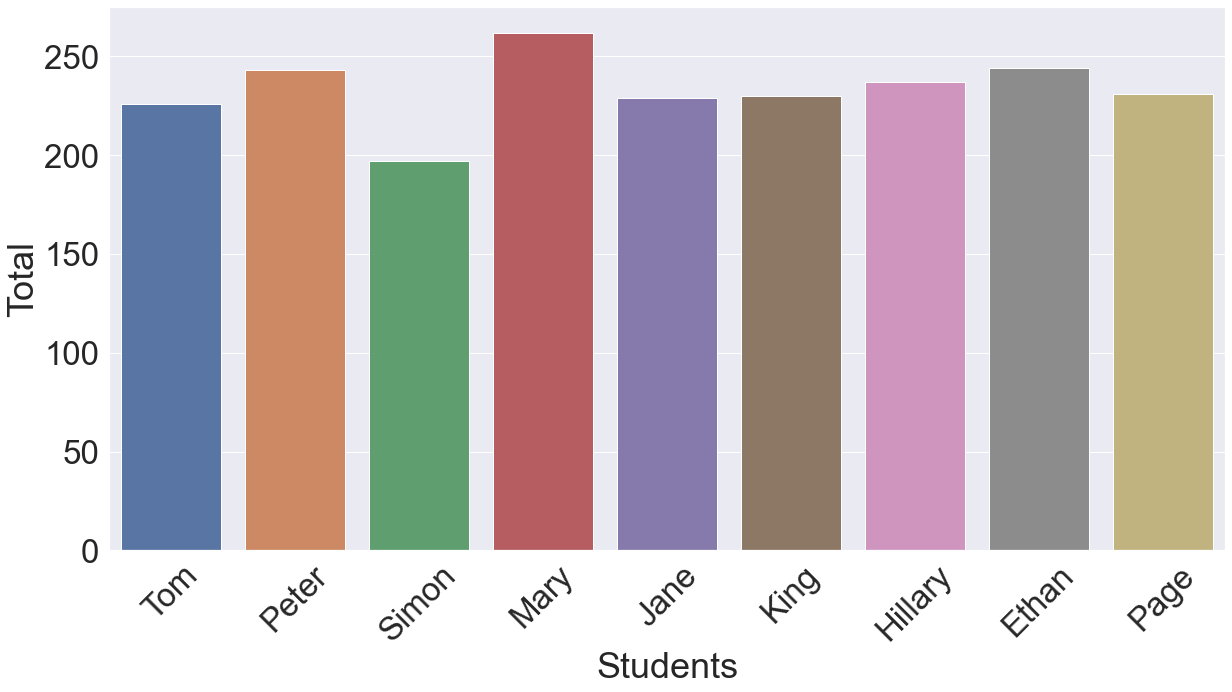

In [8]:
sns.barplot(x=score_df['Students'], y=score_df['Total'])
plt.xticks(rotation=45)
plt.show()

###### Horizontal Bar chart
Simply interchange x and y axes

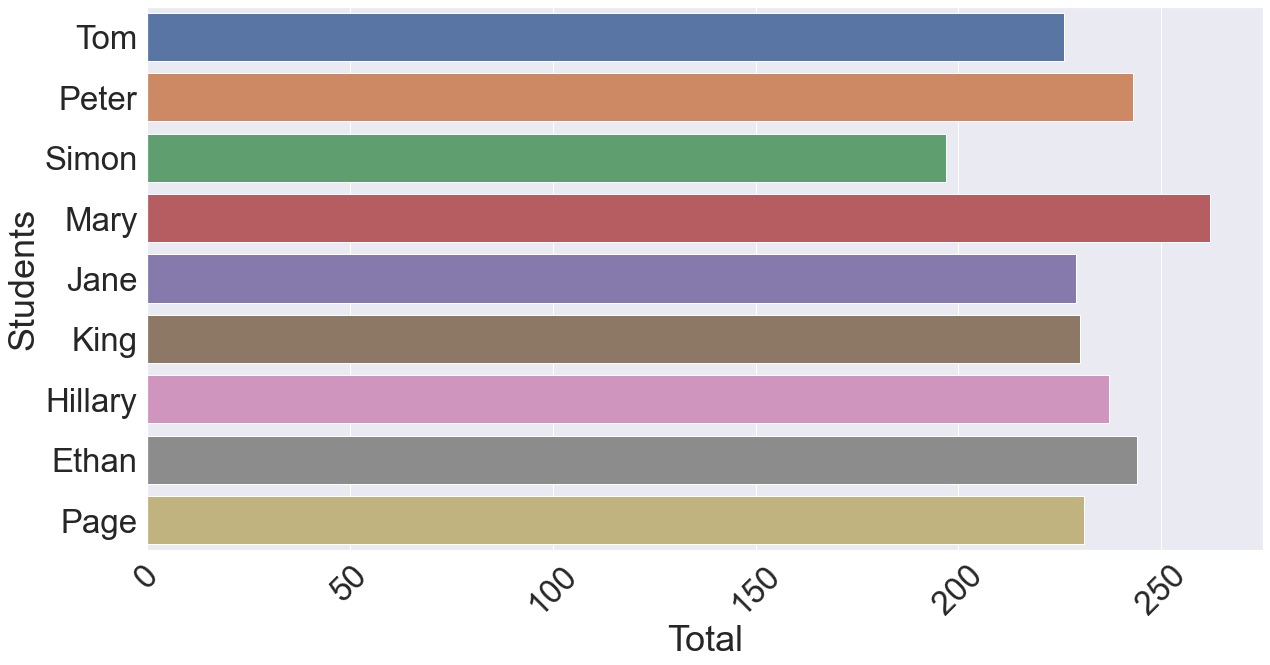

In [9]:
sns.barplot(y=score_df['Students'], x=score_df['Total'])
plt.xticks(rotation=45)
plt.show()

###### Grouped Bar chart

In [10]:
score_melt_df=pd.melt(score_df.reset_index().head(),id_vars=['Students'],value_vars=['Math','Physics','Computer'],
        value_name='Score')
score_melt_df.head()

,Students,variable,Score
0,Tom,Math,79.0
1,Peter,Math,67.0
2,Simon,Math,80.0
3,Mary,Math,84.0
4,Jane,Math,70.0


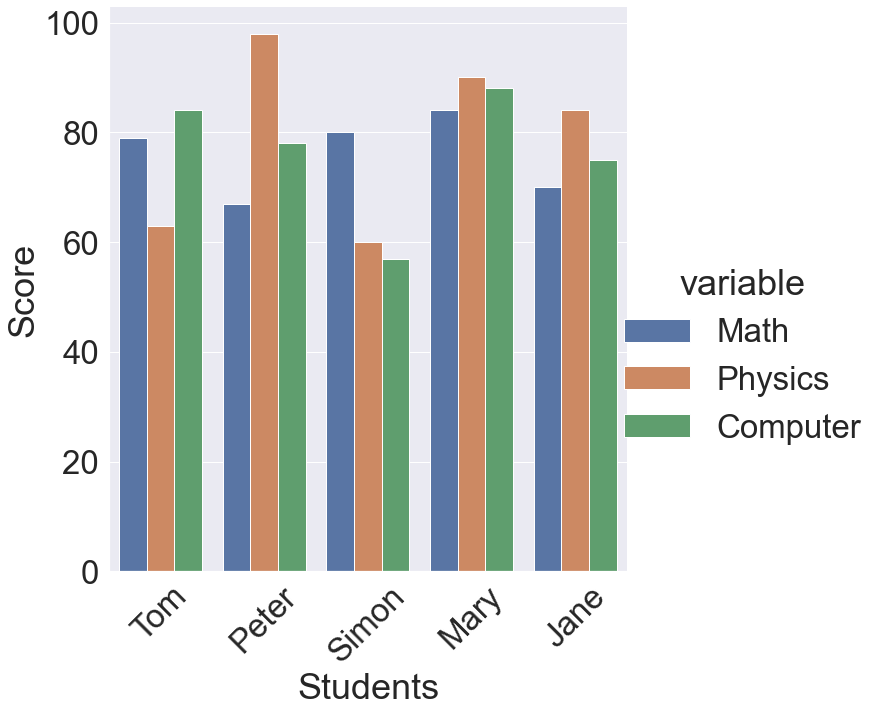

In [11]:
sns.catplot(data=score_melt_df, kind="bar", x="Students", y="Score", hue="variable",height=10)
plt.xticks(rotation=45)
plt.show()

###### Stacked Bar Chart

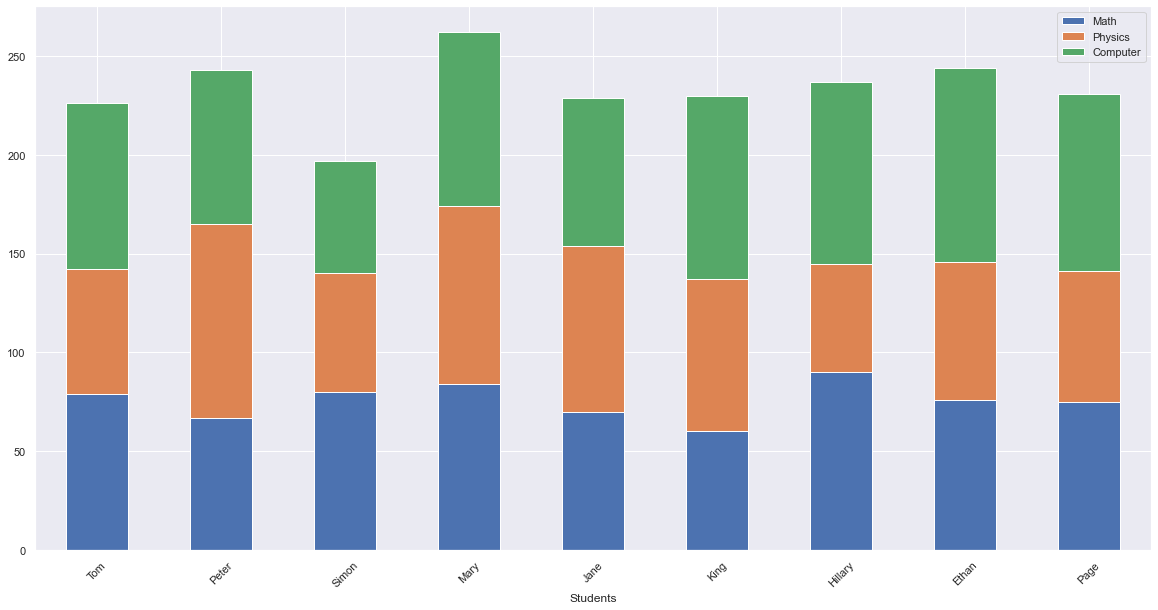

In [12]:
sns.set()
score_df[['Students','Math','Physics','Computer']].set_index('Students').plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.show()

## Scatter Plot

In [13]:
iris_df=pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###### Simple Scatter plot

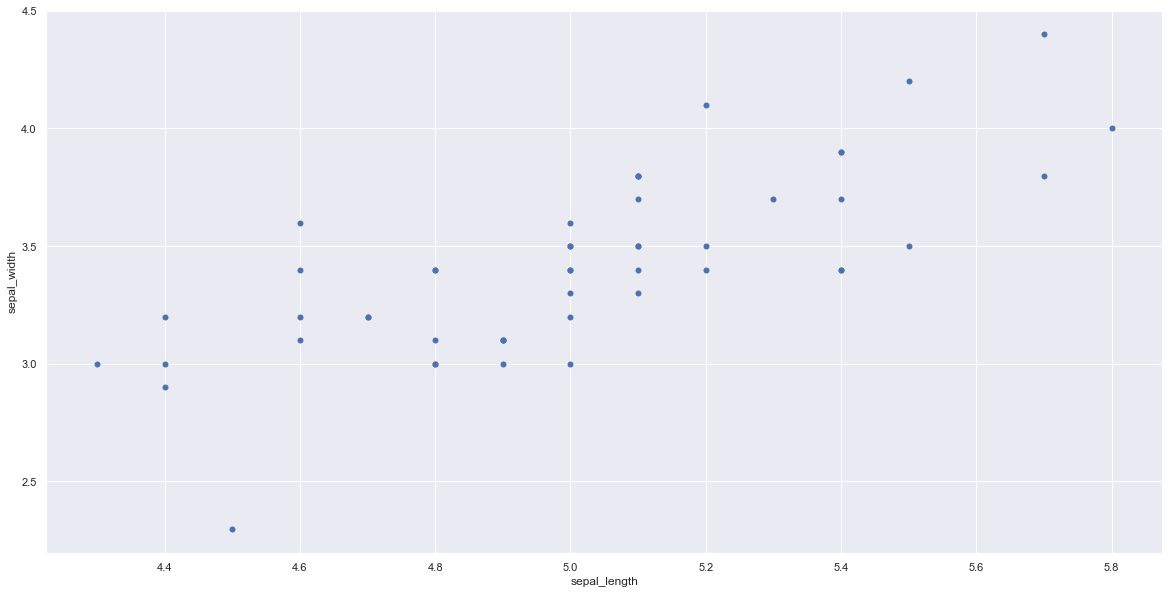

In [14]:
setosa_df=iris_df[iris_df['class']=='Iris-setosa']

sns.scatterplot(x="sepal_length", y="sepal_width", sizes=(1, 8), linewidth=0,data=setosa_df)
plt.show()

###### Multi-class Scatter plot

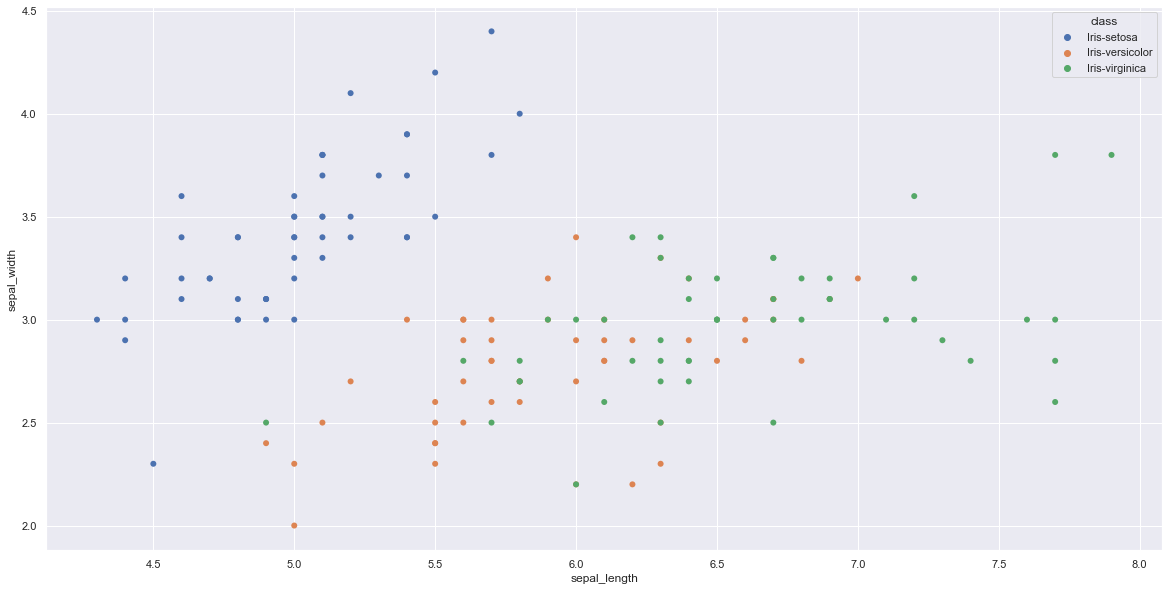

In [15]:
setosa_df=iris_df[iris_df['class']=='Iris-setosa']

sns.scatterplot(x="sepal_length", y="sepal_width", sizes=(1, 8), linewidth=0,data=iris_df,hue='class')
plt.show()